### Entrada de dados

In [2]:
Arquivo_de_entrada = [5,[1,2],[2,5],[5,3],[4,5],[1,5]]

### Funções

In [3]:
#Entrada do grafo
def csv_grafo(Entrada):
    grafo = {}
    for i in Entrada:
        vizinhos = []

        #Organizando o Grafo em um dict (talvez tire ou arrume)
        if type(i) is list:
            if i[0] and i[1] not in grafo:
                grafo[i[0]] = [i[1]]
                grafo[i[1]] = [i[0]]
            elif i[0] not in grafo:
                grafo[i[0]] = [i[1]]
                grafo[i[1]].append(i[0])
            elif i[1] not in grafo:
                grafo[i[0]].append(i[1])
                grafo[i[1]] = [i[0]]
            else:
                grafo[i[0]].append(i[1])
                grafo[i[1]].append(i[0])
    return grafo

In [4]:
import networkx as nx
import random

#Desenhar o grafo baseado na entrada de um vertice
def hierarchy_pos(G, root=None, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5):

    if not nx.is_tree(G):
        raise TypeError('cannot use hierarchy_pos on a graph that is not a tree')

    if root is None:
        if isinstance(G, nx.DiGraph):
            root = next(iter(nx.topological_sort(G)))  #allows back compatibility with nx version 1.11
        else:
            root = random.choice(list(G.nodes))

    def _hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, pos = None, parent = None):
    
        if pos is None:
            pos = {root:(xcenter,vert_loc)}
        else:
            pos[root] = (xcenter, vert_loc)
        children = list(G.neighbors(root))
        if not isinstance(G, nx.DiGraph) and parent is not None:
            children.remove(parent)  
        if len(children)!=0:
            dx = width/len(children) 
            nextx = xcenter - width/2 - dx/2
            for child in children:
                nextx += dx
                pos = _hierarchy_pos(G,child, width = dx, vert_gap = vert_gap, 
                                    vert_loc = vert_loc-vert_gap, xcenter=nextx,
                                    pos=pos, parent = root)
        return pos

            
    return _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)

In [15]:
import networkx as nx

def Arvore(Vetice,Entrada):
    #Salvando os vertices ja descobertos(suas camadas)
    vetices_descobertos = []
    G = nx.DiGraph()
    G.add_node(Vetice)
    vetices_descobertos.append(Vetice)

    
    #definindo o primeiro vertice
    for i in Entrada[Vetice]:
            #Adicionando suas arestas
            G.add_edge(Vetice, i)
            vetices_descobertos.append(i)
    #ver se um vertice ja foi descoberto
    for i in Entrada:
        for j in Entrada[i]:
            if i and j not in vetices_descobertos:
                G.add_edge(i, j)

    #print(G.edges)
    Distancia(G)
    return G.edges
    #nx.spring_layout(G, k=0.15)
    #nx.draw(G, with_labels=True)

In [16]:
#distancia dos vertices
def Distancia(G):
    #Cria uma lista com os vértices que formam as arestas
    tuplas = list(G.edges)

    #Pega tamanho dessa lista
    tamanho = len(tuplas)
    
    #Define contador
    contador = 1

    #Inicializador do while
    i = 0

    #Enquanto o tamanho da lista não for 0 ele percorre a lista
    while i < tamanho:
        #Quando o primeiro vértice da tupla for igual ao vértice inicial ele sempre terá caminho 1
        if tuplas[tamanho-1][0] == tuplas[0][0]:
            contador = 1
            print("O vértice:", tuplas[tamanho-1][1], "tem distância de", contador, "do vértice raíz")

        #Senão, quando o primeiro vértice da tupla é diferente do vértice inicial o contador aumenta
        else:
            contador = contador + 1
            print("O vértice:", tuplas[tamanho-1][1], "tem distância de", contador,"do vértice raíz")
        tamanho = tamanho - 1

In [17]:
Grafo_Organizado = csv_grafo(Arquivo_de_entrada)
Grafo_Organizado

{1: [2, 5], 2: [5], 5: [3, 4, 1], 3: [5], 4: [5]}

In [19]:
Grafo = Arvore(5,Grafo_Organizado)
Grafo

O vértice: 2 tem distância de 2 do vértice raíz
O vértice: 1 tem distância de 1 do vértice raíz
O vértice: 4 tem distância de 1 do vértice raíz
O vértice: 3 tem distância de 1 do vértice raíz


OutEdgeView([(5, 3), (5, 4), (5, 1), (1, 2)])

O vértice: 2 tem distância de 2 do vértice raíz
O vértice: 1 tem distância de 3 do vértice raíz
O vértice: 4 tem distância de 4 do vértice raíz
O vértice: 5 tem distância de 1 do vértice raíz


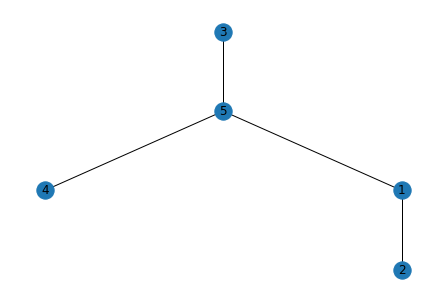

In [20]:
import matplotlib.pyplot as plt
import networkx as nx
G=nx.Graph()

vertice_desejado = 3

G.add_edges_from(Arvore(vertice_desejado,Grafo_Organizado))
pos = hierarchy_pos(G,vertice_desejado)    
nx.draw(G, pos=pos, with_labels=True)